# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [1]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


## Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer: 

For PCA, the first dimension should be the vector representing the consumption habits of most consumers. I guess the first comsuption pattern would be the category of 'Fresh'.

For ICA, the type of vectors show up should be a set of mutually independent vectors representing customers' expenditure patterns. I think one of the vectors represents the 'Fresh' category and another represents the 'Milk' plus 'Grocery'. 

### PCA

In [2]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=data.shape[1])
pca.fit(data)
# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: 

The variance of the first dimension is 0.45, which means the data along this vector has the largest variance. The variance of the second largest dimension is 0.405, but it plunges to 0.07 for the third largest dimesion. Therefore there is a dramatic decline by dimension. All the last three dimensions have very small variances, therefore the data do not vary much along these three vectors.

I will choose the first two largest dimensions because the variance of the third one is about six times smaller than first two variances. 

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: 

The dimensions seem to represent the eigen patterns of customers' expenditure on goods. The first dimension illustrates how much 'Fresh' goods a customer bought annually. The second dimension corresponds to the 'Milk' and 'Gorcery' categories, which can be used to explain how much goods of these two categories are bought annually. The data have large variances along these two dimensions. 

To use the information, we can project each data entry onto the calculated dimension by performing dot operation. 

### ICA

In [3]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
ica = FastICA(n_components=data.shape[1], random_state=0)
data_mean = data - np.mean(data, axis = 0)
ica.fit(data_mean) 
# Print the independent components
print ica.components_

[[ -3.96476778e-06   9.45325808e-07   4.66853032e-07   7.07404180e-07
   -1.60162442e-06   1.02573298e-06]
 [  2.95200606e-07  -1.04371945e-06  -1.36507959e-05   1.32245720e-06
    2.77800563e-05   5.37812672e-06]
 [ -3.88351141e-07  -3.13090138e-07  -6.05147731e-07  -5.30446962e-07
    4.43452988e-07   1.81800253e-05]
 [ -2.22243559e-07   6.98550165e-06  -5.27194420e-06  -7.60920714e-07
   -4.59784873e-06  -3.31640062e-06]
 [ -3.39493192e-07  -7.46323064e-06   2.52138482e-06   7.61921583e-08
   -4.01019796e-06   5.36150524e-06]
 [ -8.61165212e-07  -1.94837286e-07   8.68147245e-07   1.11487357e-05
   -6.00050152e-07  -5.93971213e-06]]


In [4]:
# normalize each vector so that it can be explained clearly
print ica.components_ / np.linalg.norm(ica.components_, axis = 1).reshape(6,1)
#    Fresh       Milk       Grocery     Frozen  Detergents_Paper  Delicatessen

[[-0.86624143  0.2065393   0.10200028  0.15455705 -0.34993056  0.22410705]
 [ 0.00938244 -0.03317283 -0.43386712  0.04203203  0.88294142  0.17093453]
 [-0.02132618 -0.01719325 -0.0332315  -0.02912933  0.02435208  0.9983505 ]
 [-0.02125222  0.6679944  -0.50413404 -0.07276368 -0.4396731  -0.31713356]
 [-0.03281917 -0.72147859  0.243745    0.00736558 -0.38767018  0.51830252]
 [-0.06777094 -0.01533307  0.06832041  0.87736976 -0.04722202 -0.46743631]]


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer:

   Fist vector: It corresponds to the Fresh goods. The data along this vector show large variances.
   
   Second vector: It corresponds to the Detergents_Paper goods.
   
   Third vector: It corresponds to the Delicatessen goods. 
   
   Fourth vector: It corresponds to the Milk, Grocery, Detergents_Paper and Delicatessen goods.The data along this vector shows that the customers spend equally on these categories.
   
   Fifth vector: It corresponds to the Milk, and Delicatessen goods.
   
   Six vector: It cooresponds to Frozen category.
    
   These components can project the original data onto new bases so that the consumption patterns can be analyzed more easily.
   

## Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

### Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 
For K Means:
1. It can scale with the growing size of samples by increasing the K value appropriately.
2. It is one of the simplest algorithm in unsupervised learning.

For Gaussian Mixture Models (GMM):
1. It can generate more tighter clusers than hierarchical clustering.
2. It is cheaper and faster than hierarchical clustering. 


**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [5]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [11]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation

reduced_data = PCA(n_components=2).fit_transform(data)
print reduced_data[:10]  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [7]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

# clusters = KMeans(n_clusters=8)
clusters = GMM(n_components=6)
clusters.fit(reduced_data)
print clusters

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=6, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001)


In [8]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [9]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 
centroids = clusters.means_
# centroids = np.vstack([centroids, [0,0]])
print centroids

[[ -5775.25608572  -2804.02019039]
 [  9533.08979559   2875.86777608]
 [  2917.75633744  -7172.67502341]
 [-31722.83442405  -6802.26852706]
 [  3172.01367966  13259.54628747]
 [-18416.8385771   45914.98214137]]


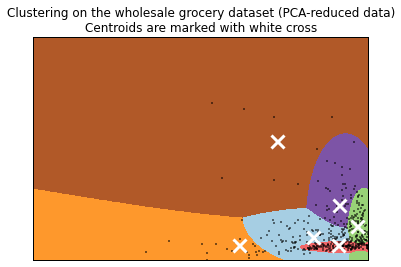

In [10]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: I use GMM method to group the data into six clusters.

First cluster (orange) [-31722.83442405  -6802.26852706] : the central object is the customers who bought least Fresh, Milk and Grocery goods among the dataset.

Second cluster (azure) [ -5775.25608572  -2804.02019039] : the central object is the customers who bought more Fresh goods and Milk, Grocery goods than the customers in the first cluster. 

Thired cluster (red) [  2917.75633744  -7172.67502341] : the central object is the customers buying even more Fresh goods than the second cluster customers, but almost same least Milk and Grocery goods as the first group customers.

Fourth cluster (green) [  9533.08979559   2875.86777608] : this cluster customers bought most Fresh goods, and they bought more Milk and Grocery goods than the customers of the third cluster.

Fifth cluster (purple) [  3172.01367966  13259.54628747] : the customers in this cluster bought the same amount of Fresh goods as the third cluster customers, but they bought more Milk and Grocery goods than the fourth cluster.

Sixth cluster (brown) [-18416.8385771   45914.98214137] : the central objects are for the customers who bought most Milk and Grocery goods. 


#### Try 2 clusters

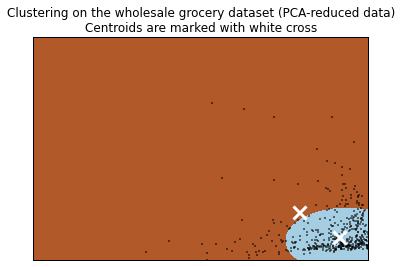

In [15]:
clusters = GMM(n_components=2)
clusters.fit(reduced_data)
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])
# TODO: Find the centroids for KMeans or the cluster means for GMM 
centroids = clusters.means_
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

#### Try 4 clusters

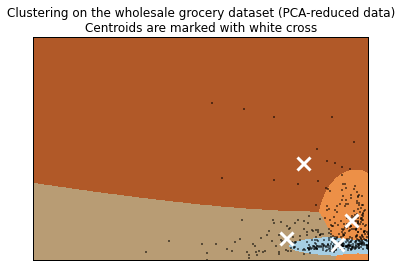

In [14]:
clusters = GMM(n_components=4)
clusters.fit(reduced_data)
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])
# TODO: Find the centroids for KMeans or the cluster means for GMM 
centroids = clusters.means_
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

### Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: I feel the GMM method is better. 

In the K Means method, we are certain that a data point belongs to only one cluster. This is a "hard assignment". While in the GMM, a data point can be grouped into different clusters simultaneouly with different probabilities. This is called "soft assignment". The method incorporates the degree of uncertainty we have about out assignment.

Because of the soft assignment of the GMM method, some data can be clustered into two groups simultaneously. I think this would help us find more accurately the central object of each group which stands for the typical cusumption habit of customers.

**9)** How would you use that technique to help the company design new experiments?

Answer: Several customers from the same cluster can be sampled and let them try both the regular morning delivery and the cheaper, bulk evening delivery. Based on their feedback and the analysis of their cusumption habits, the company can launch different delivery method for different groups of customers.

**10)** How would you use that data to help you predict future customer needs?

Answer: After the unsupervised learning process finished, we can use the data as the training dataset and label each group with the results from the unsupervised learning to train a supervised learner, then future customer needs can be predicted by the model. 